In [22]:
#!pip uninstall pystan

In [23]:
#!pip uninstall prophet

In [31]:
!pip install pmdarima

In [27]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
#from colorsetup import colors, palette
#sns.set_palette(palette)
import warnings
warnings.simplefilter(action='ignore')
import fbprophet
#import pmdarima as pm

In [160]:
df_all_stock = pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv', 
                           skipfooter=2, 
                           infer_datetime_format=True, 
                           header=0, 
                           index_col=0, engine='python')

df_all_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7779 entries, 2017-01-03 to 2017-12-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7755 non-null   float64
 1   High    7770 non-null   float64
 2   Low     7760 non-null   float64
 3   Close   7779 non-null   float64
 4   Volume  7779 non-null   int64  
 5   Name    7779 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 425.4+ KB


In [29]:
# We take apple, boeing, and walmart stock data for analysis
df_AAPL = df_all_stock[df_all_stock['Name'] == 'AAPL']
df_AAPL.index = pd.to_datetime(df_AAPL.index)
df_AAPL.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865,AAPL
2017-01-04,115.85,116.51,115.75,116.02,21118116,AAPL
2017-01-05,115.92,116.86,115.81,116.61,22193587,AAPL
2017-01-06,116.78,118.16,116.47,117.91,31751900,AAPL
2017-01-09,117.95,119.43,117.94,118.99,33561948,AAPL


In [30]:
df_BA = df_all_stock[df_all_stock['Name'] == 'BA']
df_BA.index = pd.to_datetime(df_BA.index)
df_BA.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-01-03,156.30,157.14,155.21,156.97,3426113,BA
2017-01-04,157.81,159.23,157.81,158.62,3189810,BA
2017-01-05,158.41,159.70,157.40,158.71,2795984,BA
2017-01-06,158.98,159.66,157.89,159.10,2426662,BA
2017-01-09,159.00,159.24,158.17,158.32,2839400,BA


In [31]:
df_WMT = df_all_stock[df_all_stock['Name'] == 'WMT']
df_WMT.index = pd.to_datetime(df_WMT.index)
df_WMT.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-01-03,69.24,69.24,68.05,68.66,10473162,WMT
2017-01-04,68.66,69.63,68.60,69.06,7917952,WMT
2017-01-05,68.43,69.33,68.12,69.21,7099170,WMT
2017-01-06,68.41,68.50,68.01,68.26,9491115,WMT
2017-01-09,68.33,68.80,68.32,68.71,8685232,WMT


In [32]:
df_BA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
 5   Name    251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


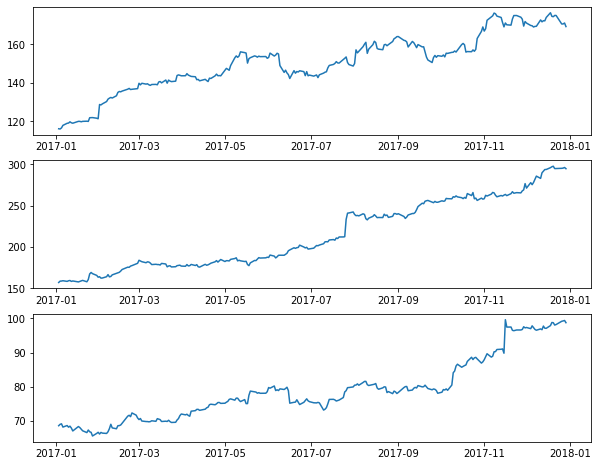

In [33]:
# Plot the close price vs date
plt.rcParams['figure.figsize'] = [10, 8]
#annual_temp = monthly_temp.resample('A').mean()
fig, axes = plt.subplots(3,1)
axes[0].plot(df_AAPL['Close'])
axes[1].plot(df_BA['Close'])
axes[2].plot(df_WMT['Close'])

In [34]:
df_AAPL.drop(['Open', 'High', 'Low', 'Volume', 'Name'], axis=1, inplace=True)
df_BA.drop(['Open', 'High', 'Low', 'Volume', 'Name'], axis=1, inplace=True)
df_WMT.drop(['Open', 'High', 'Low', 'Volume', 'Name'], axis=1, inplace=True)

In [15]:
# Statistical test?

In [ ]:
# Model 1: Triple Exponential Smoothing
# Assume a monthly (21 days?) seasonality, and an additive trend

In [47]:
# Borrow functions from the lab
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

MSE:  102.02590968772684


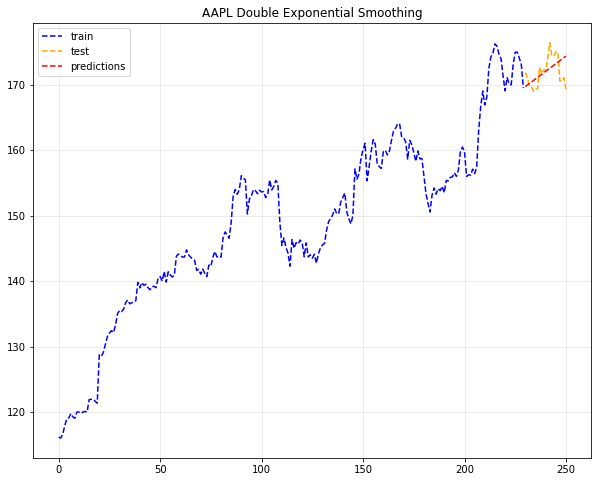

In [181]:
from statsmodels.tsa.api import ExponentialSmoothing

# Train-test split
test_size = 21
data_used = df_AAPL

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

# TES
double = ExponentialSmoothing(train, trend="additive").fit(optimized=True)
double_preds = double.forecast(len(test))
#print(test.shape, triple_preds.shape)
double_mse = mse(test, double_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", double_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("AAPL Double Exponential Smoothing")
plt.grid(alpha=0.3)

MSE:  4880.165700894782


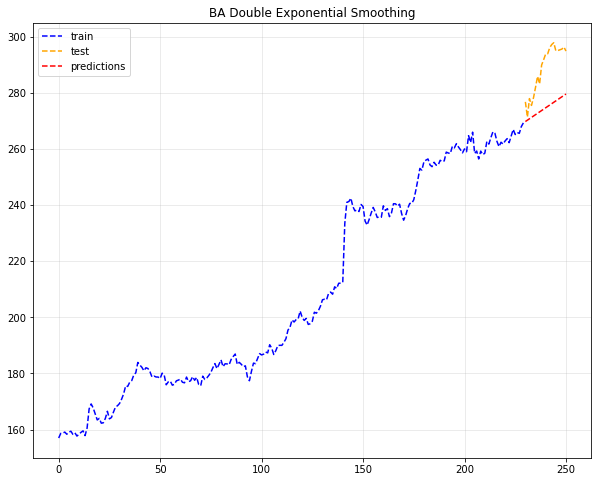

In [182]:
from statsmodels.tsa.api import ExponentialSmoothing

# Train-test split
test_size = 21
data_used = df_BA

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

# TES
double = ExponentialSmoothing(train, trend="additive").fit(optimized=True)
double_preds = double.forecast(len(test))
#print(test.shape, triple_preds.shape)
double_mse = mse(test, double_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", double_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("BA Double Exponential Smoothing")
plt.grid(alpha=0.3)

MSE:  30.107312937295188


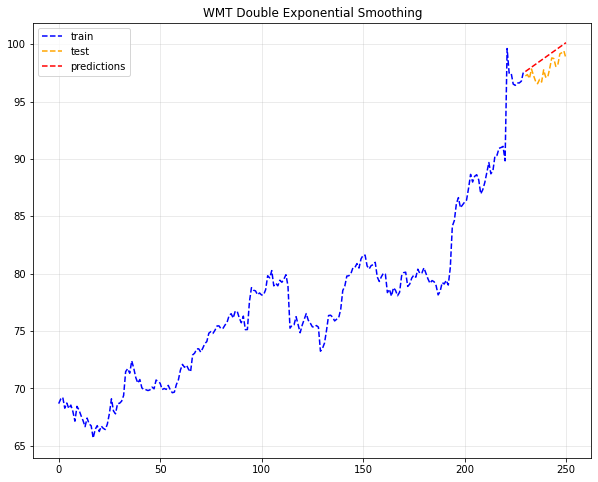

In [183]:
from statsmodels.tsa.api import ExponentialSmoothing

# Train-test split
test_size = 21
data_used = df_WMT

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

# TES
double = ExponentialSmoothing(train, trend="additive").fit(optimized=True)
double_preds = double.forecast(len(test))
#print(test.shape, triple_preds.shape)
double_mse = mse(test, double_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", double_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("WMT Double Exponential Smoothing")
plt.grid(alpha=0.3)

MSE:  129.32148466218862


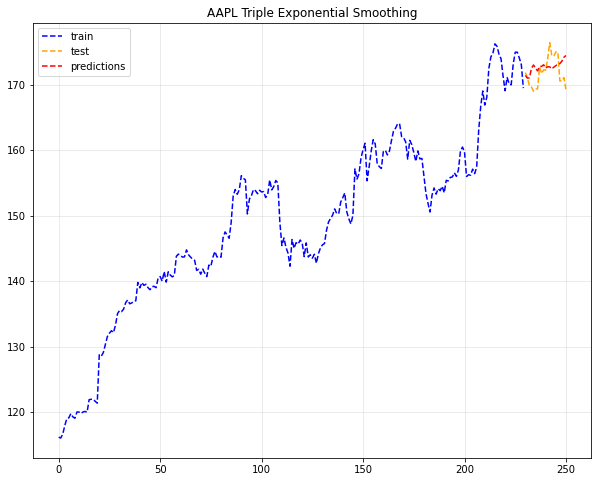

In [184]:
from statsmodels.tsa.api import ExponentialSmoothing

# Train-test split
test_size = 21
data_used = df_AAPL

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

# TES
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=21).fit(optimized=True)
triple_preds = triple.forecast(len(test))
#print(test.shape, triple_preds.shape)
triple_mse = mse(test, triple_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("AAPL Triple Exponential Smoothing")
plt.grid(alpha=0.3)

MSE:  5452.871364799165


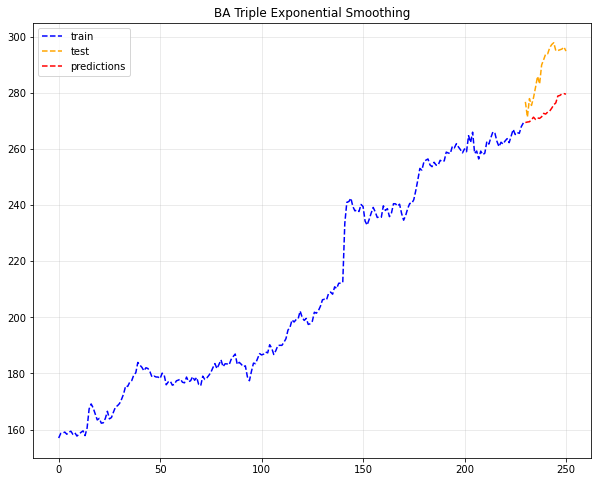

In [185]:
# Train-test split
test_size = 21
data_used = df_BA

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

# TES
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=21).fit(optimized=True)
triple_preds = triple.forecast(len(test))
#print(test.shape, triple_preds.shape)
triple_mse = mse(test, triple_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("BA Triple Exponential Smoothing")
plt.grid(alpha=0.3)

MSE:  34.45890075211389


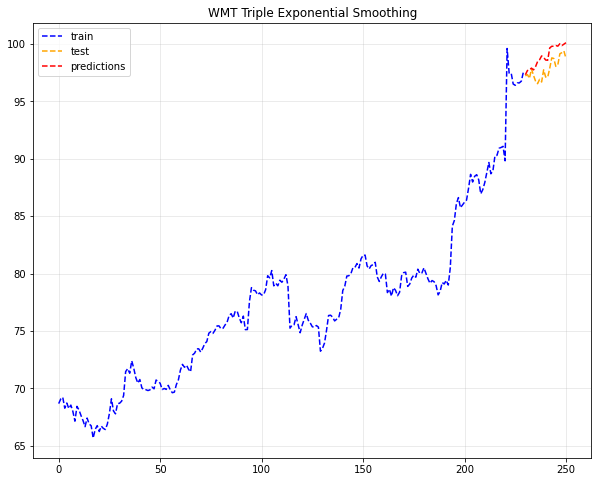

In [186]:
# Train-test split
test_size = 21
data_used = df_WMT

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

# TES
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=21).fit(optimized=True)
triple_preds = triple.forecast(len(test))
#print(test.shape, triple_preds.shape)
triple_mse = mse(test, triple_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("WMT Triple Exponential Smoothing")
plt.grid(alpha=0.3)

In [17]:
# Model 2: SARIMA

In [70]:
# Borrow functions from the lab
# define helper plot function for visualization
def plots(data, lags=None):
    layout = (3, 1)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (1, 0))
    pacf = plt.subplot2grid(layout, (2, 0))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

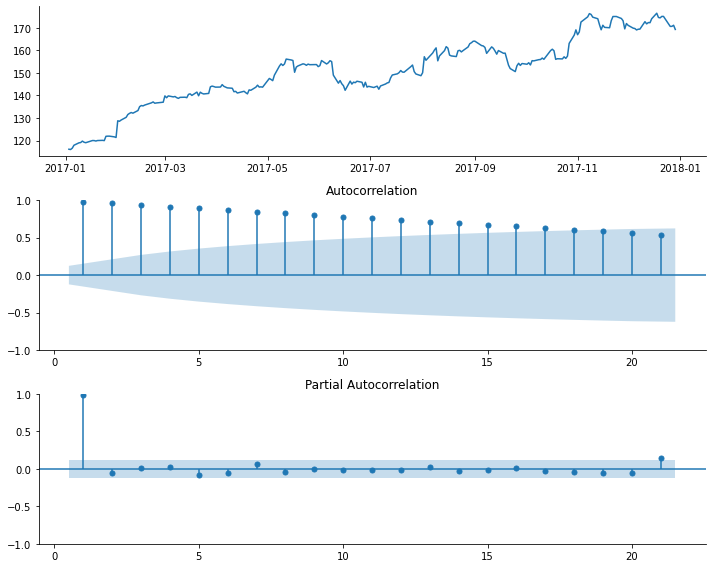

In [73]:
plots(df_AAPL, lags=21)

In [187]:
# Autocorrelation is large, use d=1
# Decay, starting after a few lags, use AR+MA, order = 1
# Assume linear trend

sar = sm.tsa.statespace.SARIMAX(df_AAPL, 
                                order=(1,1,1), 
                                seasonal_order=(0,0,0,21), 
                                trend='t').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -486.482
Date:                Tue, 15 Feb 2022   AIC                            980.965
Time:                        10:22:23   BIC                            995.051
Sample:                             0   HQIC                           986.634
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0010      0.001      0.657      0.511      -0.002       0.004
ar.L1         -0.0982      1.611     -0.061      0.951      -3.256       3.059
ma.L1          0.1499      1.612      0.093      0.926      -3.010       3.310
sigma2         2.8817      0.165     17.430      0.000       2.558       3.206
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               118.32
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

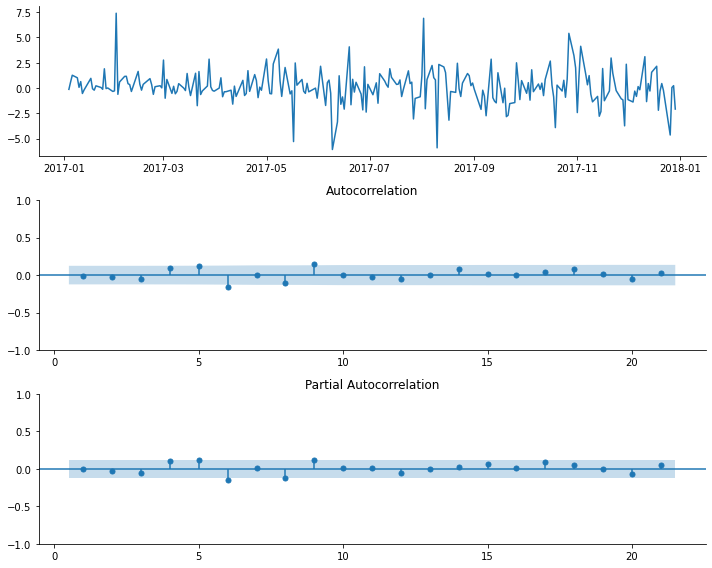

In [188]:
plots(sar.resid[sar.loglikelihood_burn:], lags=21)

(22,)
MSE:  101.94214882887285


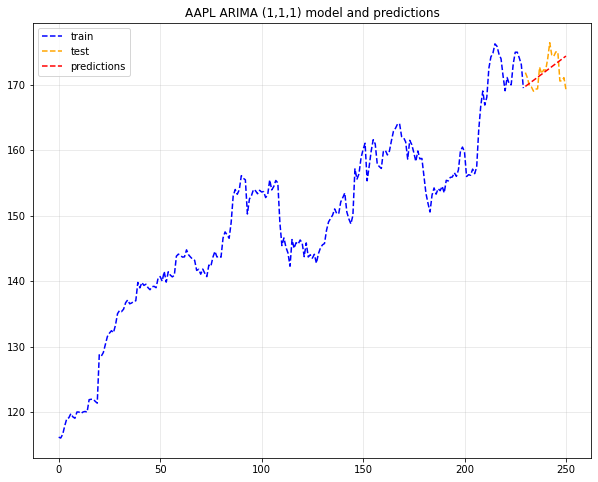

In [171]:
# Train-test split
test_size = 21
data_used = df_AAPL

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

sar_pred = sm.tsa.arima.ARIMA(train, order=(1,1,1), trend='t').fit()

arima_preds = sar_pred.predict(start = len(train)+1, end= len(train)+21, dynamic=False)
print(arima_pred.shape)
arima_mse = mse(test, arima_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", arima_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], arima_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("AAPL ARIMA (1,1,1) model and predictions")
plt.grid(alpha=0.3)

(22,)
MSE:  4552.23041008959


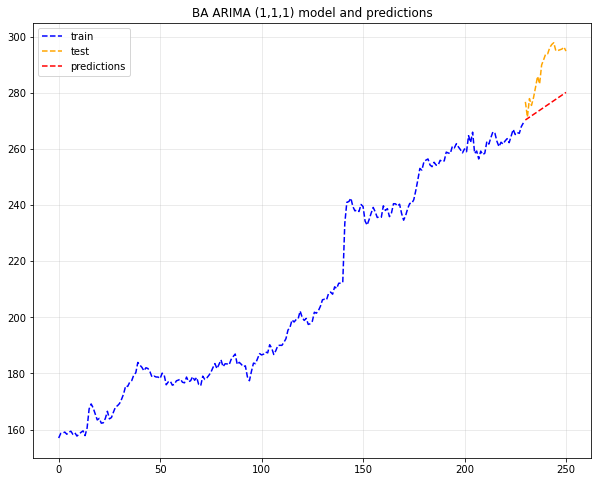

In [172]:
# Train-test split
test_size = 21
data_used = df_BA

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

sar_pred = sm.tsa.arima.ARIMA(train, order=(1,1,1), trend='t').fit()

arima_preds = sar_pred.predict(start = len(train)+1, end= len(train)+21, dynamic=False)
print(arima_pred.shape)
arima_mse = mse(test, arima_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", arima_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], arima_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("BA ARIMA (1,1,1) model and predictions")
plt.grid(alpha=0.3)

(22,)
MSE:  34.36627621325443


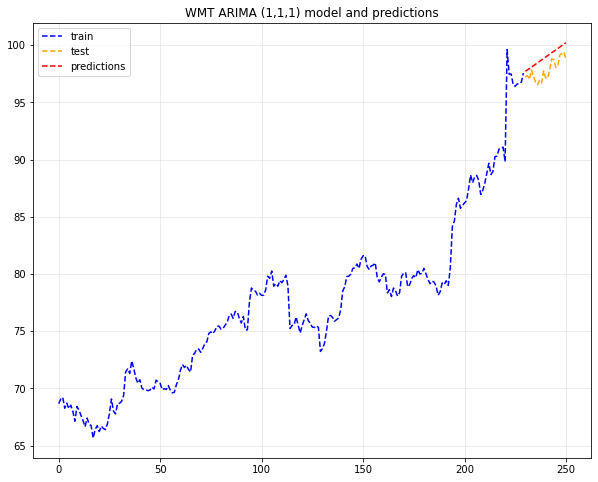

In [173]:
# Train-test split
test_size = 21
data_used = df_WMT

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

sar_pred = sm.tsa.arima.ARIMA(train, order=(1,1,1), trend='t').fit()

arima_preds = sar_pred.predict(start = len(train)+1, end= len(train)+21, dynamic=False)
print(arima_pred.shape)
arima_mse = mse(test, arima_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", arima_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], arima_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("WMT ARIMA (1,1,1) model and predictions")
plt.grid(alpha=0.3)

(22,)
MSE:  174.01783117082218


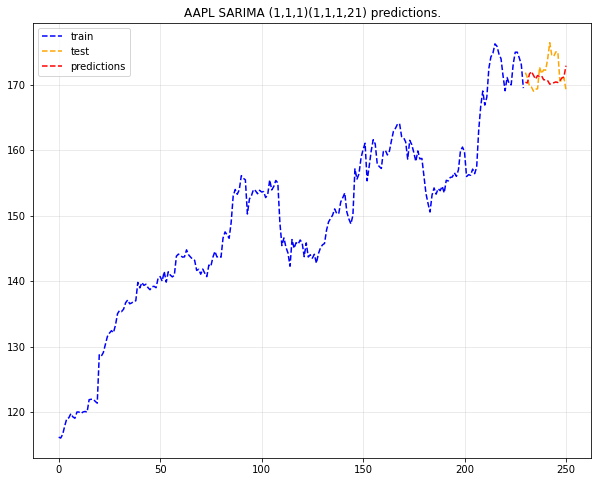

In [177]:
# Train-test split
test_size = 21
data_used = df_AAPL

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

sar_pred = sm.tsa.statespace.SARIMAX(train, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,21), 
                                trend='t').fit()

arima_preds = sar_pred.predict(start = len(train)+1, end= len(train)+21, dynamic=False)
print(arima_pred.shape)
arima_mse = mse(test, arima_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", arima_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], arima_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("AAPL SARIMA (1,1,1)(1,1,1,21) predictions.")
plt.grid(alpha=0.3)

(22,)
MSE:  4242.371384875111


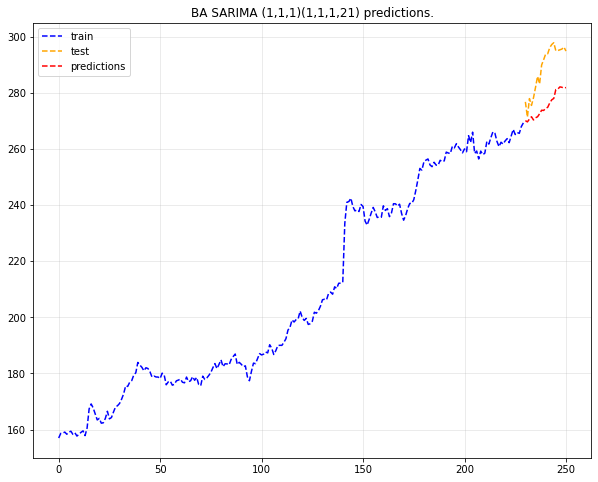

In [178]:
# Train-test split
test_size = 21
data_used = df_BA

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

sar_pred = sm.tsa.statespace.SARIMAX(train, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,21), 
                                trend='t').fit()

arima_preds = sar_pred.predict(start = len(train)+1, end= len(train)+21, dynamic=False)
print(arima_pred.shape)
arima_mse = mse(test, arima_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", arima_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], arima_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("BA SARIMA (1,1,1)(1,1,1,21) predictions.")
plt.grid(alpha=0.3)

(22,)
MSE:  532.3617722982895


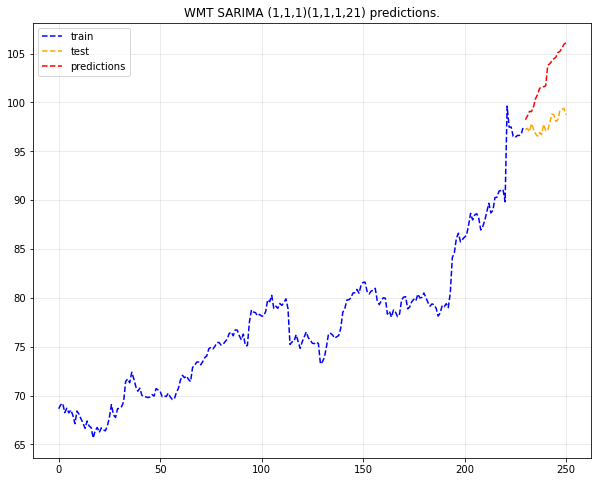

In [179]:
# Train-test split
test_size = 21
data_used = df_WMT

train = data_used[:-test_size]['Close'].to_numpy()
test = data_used[-test_size:]['Close'].to_numpy()

sar_pred = sm.tsa.statespace.SARIMAX(train, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,21), 
                                trend='t').fit()

arima_preds = sar_pred.predict(start = len(train)+1, end= len(train)+21, dynamic=False)
print(arima_pred.shape)
arima_mse = mse(test, arima_preds)
#print("Predictions: ", triple_preds)
print("MSE: ", arima_mse)

# Plot results
date_label = list(range(251))
plt.plot(date_label[:-test_size], train, 'b--', label="train")
plt.plot(date_label[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(date_label[-test_size:], arima_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("WMT SARIMA (1,1,1)(1,1,1,21) predictions.")
plt.grid(alpha=0.3)